In [1]:
import pandas as pd
import glob

csv_files = glob.glob('data/DataSetSamples/*.csv')

dfs = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file, dtype={'D1': 'string', 'E6': 'string'})
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(6000000, 32)


,Unnamed: 0.1,Unnamed: 0,Grid_ID,Datetime,extract_year,extract_month,extract_day,C1,C2,C3,...,E4,E5,E6,E7,E8,E9,E10,extract_year_2,extract_month_3,extract_day_4
0,0.0,0,272,2022-04-04 09:50,2022.0,4.0,4.0,21.28,0.00,18.51,...,40.0,3698.0,android:Total Traffic,0.0,6.10,36.0,0.0,NaN,NaN,NaN
1,1.0,1,274,2022-04-04 09:50,2022.0,4.0,4.0,328.93,14.90,281.93,...,13196477.0,150094.0,<NA>,0.0,6.68,144.0,0.0,NaN,NaN,NaN
2,2.0,2,281,2022-04-04 09:50,2022.0,4.0,4.0,96.64,1.66,76.03,...,3062.0,4323.0,<NA>,0.0,5.00,49.0,0.0,NaN,NaN,NaN
3,3.0,3,313,2022-04-04 09:50,2022.0,4.0,4.0,43.09,0.00,38.24,...,1542.0,21049.0,android:Total Traffic,0.0,4.16,20.0,0.0,NaN,NaN,NaN
4,4.0,4,320,2022-04-04 09:50,2022.0,4.0,4.0,339.67,8.28,318.87,...,2189042.0,662496.0,android:Total Traffic;android:com.google.andro...,0.0,8.09,285.0,0.0,NaN,NaN,NaN


In [2]:
print(df.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0.1     3500000 non-null  float64
 1   Unnamed: 0       6000000 non-null  int64  
 2   Grid_ID          6000000 non-null  int64  
 3   Datetime         6000000 non-null  object 
 4   extract_year     2500000 non-null  float64
 5   extract_month    2500000 non-null  float64
 6   extract_day      2500000 non-null  float64
 7   C1               6000000 non-null  float64
 8   C2               6000000 non-null  float64
 9   C3               6000000 non-null  float64
 10  C4               6000000 non-null  float64
 11  C5               6000000 non-null  float64
 12  C6               6000000 non-null  float64
 13  C7               6000000 non-null  float64
 14  C8               6000000 non-null  float64
 15  C9               6000000 non-null  float64
 16  C10              6

Columns with a NaN values in the dataset:
- **Unnamed: 0.1** - have only index values in float type, so we can drop it
- **Unnamed: 0** - same as above, but index values are in int type
- **extract_year, extract_month, extract_day** - we have **Datetime**, so we can drop it
- **D1** - include roaming information in the grid, so NaN values also represent some information, which can be used later
- **E6** - include most used apps in the grid, so NaN values can also represent some information, but it needs future investigation
- **extract_year_2, extract_month_3, extract_day_4** - we have **DateTime** column, so we can drop it

In [3]:
drop_columns = ['Unnamed: 0', 'Unnamed: 0.1', 'extract_year', 'extract_month', 'extract_day', 'extract_year_2', 'extract_month_3', 'extract_day_4']
df.drop(drop_columns, axis=1, inplace=True)
df.head()

,Grid_ID,Datetime,C1,C2,C3,C4,C5,C6,C7,C8,...,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
0,272,2022-04-04 09:50,21.28,0.00,18.51,0.00,2.41,16.14,0.00,0.00,...,9.77,0.69,154.48,40.0,3698.0,android:Total Traffic,0.0,6.10,36.0,0.0
1,274,2022-04-04 09:50,328.93,14.90,281.93,11.59,101.76,89.08,6.62,6.29,...,0.00,108663.78,2156.72,13196477.0,150094.0,<NA>,0.0,6.68,144.0,0.0
2,281,2022-04-04 09:50,96.64,1.66,76.03,1.66,22.37,19.59,1.66,0.00,...,0.00,437.43,679.86,3062.0,4323.0,<NA>,0.0,5.00,49.0,0.0
3,313,2022-04-04 09:50,43.09,0.00,38.24,0.00,13.18,20.20,0.00,0.00,...,0.00,32.81,1180.00,1542.0,21049.0,android:Total Traffic,0.0,4.16,20.0,0.0
4,320,2022-04-04 09:50,339.67,8.28,318.87,6.62,66.95,78.03,3.31,6.29,...,0.00,14995.39,6389.75,2189042.0,662496.0,android:Total Traffic;android:com.google.andro...,0.0,8.09,285.0,0.0


Datetime column need to be converted, but it contains values in different formats, so we need to convert it to one format first.

In [4]:
datetimes = pd.to_datetime(df['Datetime'], utc=True, errors='coerce')
is_utc_dates = datetimes.isna()
utc_datetimes = df[is_utc_dates]['Datetime']

utc_datetimes = pd.to_datetime(utc_datetimes, utc=True)
datetimes = pd.concat([datetimes[~is_utc_dates], utc_datetimes], axis=0)
datetimes.sort_index(inplace=True)
df['Datetime'] = datetimes

It looks like there are 

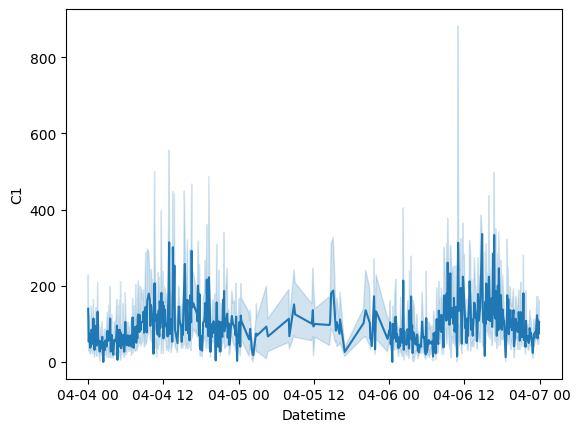

In [9]:
import seaborn as sns

batch_df = df.iloc[:10000]
sns.lineplot(x='Datetime', y='C1', data=batch_df)
print()